In [20]:
# load breaset cancer data
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
#print(cancer.feature_names)
#print(cancer.target_names)

In [22]:
# cancer to DataFrame
import pandas as pd
import numpy as np

data = pd.DataFrame(np.c_[cancer["data"], cancer["target"]], columns = np.append(cancer['feature_names'], ["target"]))
#data.head()

# x: data / y : 결과값

x = data.drop(["target"], axis=1)
y = data["target"].astype(int)


In [23]:
# data scaling StandardScaler 사용
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

x = sc.fit_transform(x) # x_train data scaling


In [50]:
from sklearn.model_selection import train_test_split
# 데이터를 test data 30% training data를 70%로 나눈다.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=20)



In [57]:
# ANN(Training)
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(50,50),# 은닉층 수 ex) (150,100) node 50,500개짜리 hidden layer 2개
               activation = 'relu', # activation function Relu로 설정
               solver = 'sgd', # algorithm (lbfgs’, ‘sgd’, ‘adam)
               tol = 1e-7,  # 우리가 러닝을 했는대 더이상 낮아지지 않으면 공부 그만해 라는 뜻
               learning_rate_init = .7, # 얼마나 움직일 것인가 learning latio
               verbose = False) # 보고 할 것인가 안할 것인가. False로 바꾸면 lossfuction값 안나옴


mlp.fit(x_train,y_train) # model 학습

C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 50), learning_rate='constant',
       learning_rate_init=0.7, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='sgd', tol=1e-07,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [68]:
from sklearn.ensemble import RandomForestClassifier
#
clf = RandomForestClassifier(n_estimators=50,max_depth = 7 ,random_state=2) # 나무의 개수 = 50인 RandomForest
clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [69]:
# DecisionTree
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7) 
#  entropy를 기준으로 사용하고 최대 깊이 7인 DecisionTree.

dtc.fit(x_train,y_train) 

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [70]:
# cross-validation k-fold 사용하여 평가
from sklearn.model_selection import cross_val_score 
ann_scores = cross_val_score(mlp, x_train, y_train,cv=5) # 5 - fold 
rf_scores = cross_val_score(clf, x_train, y_train,cv=5) # 5 - fold 
dt_scores = cross_val_score(dtc, x_train, y_train,cv=5) # 5 - fold 


print("ANN 교차 검증 점수: {}".format(ann_scores))
print("ANN 교차 검증 평균 점수: {:.2f}".format(ann_scores.mean()))
print("Random Forest 교차 검증 점수: {}".format(rf_scores))
print("Random Forest 교차 검증 평균 점수: {:.2f}".format(rf_scores.mean()))
print("Decision Tree 교차 검증 점수: {}".format(dt_scores))
print("Decision Tree 교차 검증 평균 점수: {:.2f}".format(dt_scores.mean()))


C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


ANN 교차 검증 점수: [0.925      0.95       0.9375     0.97468354 0.97468354]
ANN 교차 검증 평균 점수: 0.95
Random Forest 교차 검증 점수: [0.95       0.9625     0.925      0.92405063 1.        ]
Random Forest 교차 검증 평균 점수: 0.95
Decision Tree 교차 검증 점수: [0.9375     0.9        0.9        0.92405063 0.97468354]
Decision Tree 교차 검증 평균 점수: 0.93


In [71]:
predictions = mlp.predict(x_test) # ANN의 test값에 대한 예측 값
random_forest_pred = clf.predict(x_test) # Random Forest의 test값에 대한 예측 값
Dct_pred = dtc.predict(x_test)# Decision Tree의 test값에 대한 예측 값

In [72]:
# RandomForest confusion matrix 결과
import pandas as pd

pd.crosstab(y_test,random_forest_pred, rownames = ['True'],colnames = ['Predicted'],margins=True)


Predicted,0,1,All
True,,,
0,62,2,64
1,4,103,107
All,66,105,171


In [73]:
# ANN confusion matrix 결과
import pandas as pd

pd.crosstab(y_test,predictions, rownames = ['True'],colnames = ['Predicted'],margins=True)


Predicted,0,1,All
True,,,
0,64,0,64
1,4,103,107
All,68,103,171


In [74]:
# Decision tree confusion matrix 결과
import pandas as pd

pd.crosstab(y_test,Dct_pred, rownames = ['True'],colnames = ['Predicted'],margins=True)


Predicted,0,1,All
True,,,
0,62,2,64
1,12,95,107
All,74,97,171


In [75]:
# Accuracy 결과 값
from sklearn.metrics import accuracy_score
print("ANN accuracy %.2f" %accuracy_score(y_test,predictions)) # ANN ACcuracy 값 출력
print("Random Forest accuracy %.2f" %accuracy_score(y_test,random_forest_pred))# Random Forest 값 출력
print("Decision Tree accuracy %.2f" %accuracy_score(y_test,Dct_pred))# Decision Tree 값 출력


ANN accuracy 0.98
Random Forest accuracy 0.96
Decision Tree accuracy 0.92


In [76]:
# F-1 score
from sklearn.metrics import f1_score

print("ANN f-1 score %.2f" %f1_score(y_test,predictions)) # ANN ACcuracy 값 출력
print("Random f-1 score %.2f" %f1_score(y_test,random_forest_pred))# Random Forest 값 출력
print("Decision f-1 score %.2f" %f1_score(y_test,Dct_pred))# Decision Tree 값 출력


ANN f-1 score 0.98
Random f-1 score 0.97
Decision f-1 score 0.93


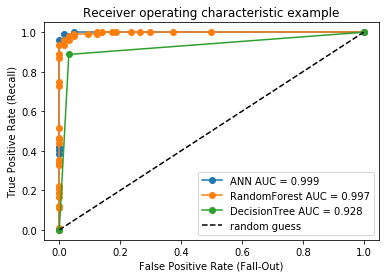

In [77]:
# Roc curve & AUC 
from sklearn.metrics import roc_curve, auc
import matplotlib.pylab as plt
# FPR,TPR ,threshold 값 계산
fpr, tpr, threshold = roc_curve(y_test, mlp.predict_proba(x_test)[:,1]) # ANN의 FPR,TPR,Threshold 값
fpr1, tpr1, threshold1 = roc_curve(y_test, clf.predict_proba(x_test)[:,1]) # Random Forest의 FPR,TPR,Threshold 값
fpr2, tpr2, threshold2 = roc_curve(y_test, dtc.predict_proba(x_test)[:,1])# Dicision tree의 FPR,TPR,Threshold 값

ann_roc_auc = auc(fpr, tpr) # ANN AUC 값
random_roc_auc = auc(fpr1,tpr1) # Random Forest AUC 값
dicision_roc_auc = auc(fpr2,tpr2) # Dicision Tree AUC 값

#plt.xlim(0,0.5)
#plt.ylim(0.5,1)

plt.plot(fpr, tpr,'-o', label = 'ANN AUC = %0.3f'%ann_roc_auc) # ANN ROC CURVE 표시
plt.plot(fpr1, tpr1,'-o', label = 'RandomForest AUC = %0.3f'%random_roc_auc)# Random Forest ROC CURVE 표시
plt.plot(fpr2, tpr2,'-o', label = 'DecisionTree AUC = %0.3f'%dicision_roc_auc)# Dicision Tree ROC CURVE 표시

plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)') # xlabel 이름
plt.ylabel('True Positive Rate (Recall)') # ylabel 이름
plt.title('Receiver operating characteristic example') # title 이름
plt.legend(loc = 'lower right') # LABEL 위치 

plt.show()